# Do Accidents go up Near Schools During the School Year?
## Using SCHMA and OpenData

## What do we want to do?

1. Let's look at all the bus accidents. Do more of them happen during the school year?
2. Pick one school and look at all the accidents around it. Do more of them happen during the school year?
3. Look at the difference between non-school year and school year accidents. Do they look like they change around schools?

In [2]:
#!/usr/bin/env python

# Header, imports, etc.
import numpy as np
import pandas as pd
import datetime
import urllib
import json
import urllib.request
import geopandas as gpd
import matplotlib
import seaborn as sb
import shapefile
import fiona
from mpl_toolkits.basemap import Basemap
import mpl_toolkits.basemap.pyproj as pyproj
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
from matplotlib.patches import PathPatch

from bokeh.plotting import *
from bokeh.models import HoverTool
from collections import OrderedDict
from itertools import chain

%matplotlib inline

okay, done here
Wall time: 0 ns


In [ ]:
# Here is the OpenData accident records file.
# Just 10,000 for now...



# here are the location geojson?

axeresp = urllib.request.urlopen(axefile).read()
schresp = urllib.request.urlopen(schfile).read()

# old code.
# jresponse = json.loads(mapresp.decode('utf-8'))

# Load it as a dataframe. 
axe_data = pd.read_json(axeresp)
sch_data = pd.read_json(schresp)

# Okay, what do you look like?
# print(axe_data.describe())
# print(sch_data.describe())
# print(sch_data.head(4))

print("okay, done here")

%time

## Add Data

In [3]:
# Only need a few columns. 

sch = sch_data[['ats_system_code','beds_number','school_year','latitude','longitude']]
sch = sch[sch['school_year'] == '2015-16']

# axe2.dtypes

# Why are these happening?
# print(axe_data['contributing_factor_vehicle_1'].value_counts())
# print(raw_data['contributing_factor_vehicle_2'].value_counts())
# print(raw_data['contributing_factor_vehicle_3'].value_counts())

# Let's do a little cleaning. "Axe" is short for accidents.
axe = axe_data.drop([ 'location',
                      'number_of_cyclist_injured',
                      'number_of_cyclist_killed',
                      'cross_street_name',
                      'contributing_factor_vehicle_1',
                      'contributing_factor_vehicle_2',
                      'contributing_factor_vehicle_3',
                      'contributing_factor_vehicle_4',
                      'contributing_factor_vehicle_5',
                      'zip_code'], axis = 1)

# print(axe['vehicle_type_code1'].value_counts())
# print(axe['vehicle_type_code2'].value_counts())
# print(axe['vehicle_type_code_3'].value_counts())
# print(axe['vehicle_type_code_4'].value_counts())

# Let's find the bus accidents!
# busaxe = axe.loc[axe['vehicle_type_code1'] == "BUS" | axe['vehicle_type_code2'] == "BUS" ]
busaxe = axe.loc[axe['vehicle_type_code1'] == "BUS"]

# print(busaxe.shape)
print(type(busaxe))

# print(busaxe.head(5))

busaxeloc = busaxe[['longitude','latitude']]
busnd = busaxeloc.values

print(busaxeloc.min())
print(busaxeloc.max())

print(busnd.shape)
print(sch.shape)

pd.set_option('display.max_rows', 1700)
# print(sch)

sch = sch[sch['latitude'] != None]
sch = sch[sch['longitude'] != 0]

print(sch.max())

<class 'pandas.core.frame.DataFrame'>
longitude   -74.249465
latitude     40.505288
dtype: float64
longitude   -73.701912
latitude     40.910201
dtype: float64
(14011, 2)
(1641, 5)
ats_system_code      75X469
beds_number        3.53e+11
school_year         2015-16
latitude            40.9033
longitude          -73.7086
dtype: object


## the mapping portion

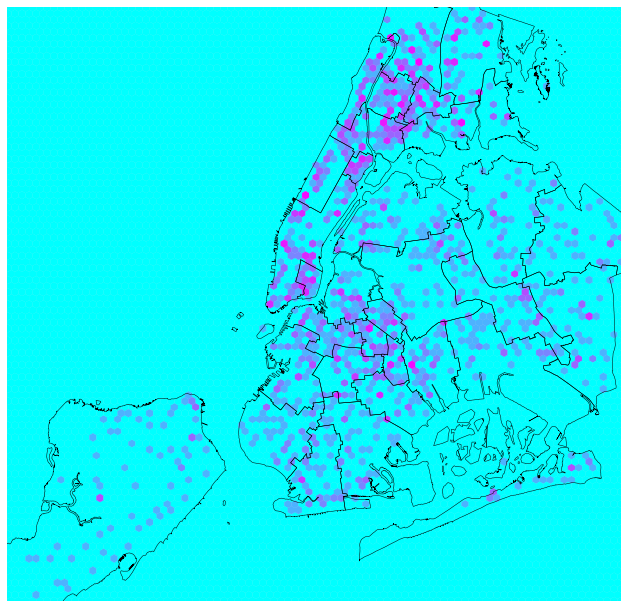

In [113]:
nycshp = fiona.open('../maps/nycd_16d/nysd_dd83.shp')
bounds = nycshp.bounds
nycshp.close()

lowerleft  = (bounds[0],bounds[1])
upperright = (bounds[2],bounds[3])

coordinates = list(chain(lowerleft,upperright))

width, height = coordinates[2] - coordinates[0], coordinates[3] - coordinates[1]

fig = plt.figure(figsize=(11,11))
ax = fig.add_subplot(111)

m = Basemap(
    projection='tmerc',
    lon_0= -73.988814,
    lat_0=  40.752806,
    ellps = 'WGS84',
    llcrnrlon= bounds[0] + .02,
    llcrnrlat= bounds[1] + .02,
    urcrnrlon= bounds[2] - .02,
    urcrnrlat= bounds[3] - .02,
    lat_ts=0,
    resolution='i',
    suppress_ticks=True)

# x, y = m(busaxe['longitude'].values, busaxe['latitude'].values)
# m.hexbin(x, y, gridsize=40, bins='log', cmap=matplotlib.cm.YlOrRd_r)

yo = m.readshapefile(shapefile = '../maps/nycd_16d/nysd_dd83', 
    name = 'nysd',  
    drawbounds=True, 
    zorder=None, 
    linewidth=0.5, 
    color='k', 
    antialiased=1, 
    ax=None, 
    default_encoding='utf-8')

patches = []

# for info, shape in zip(m.nysd_info, m.nysd):
#     patches.append( Polygon(np.array(shape), True) )
        
# ax.add_collection(PatchCollection(patches, facecolor= 'm', edgecolor='k', linewidths=1., zorder=1))

x, y = m(sch['longitude'].values, sch['latitude'].values)
m.hexbin(x,y, gridsize=90, bins='log', cmap=matplotlib.cm.cool)




## Look at the accidents.

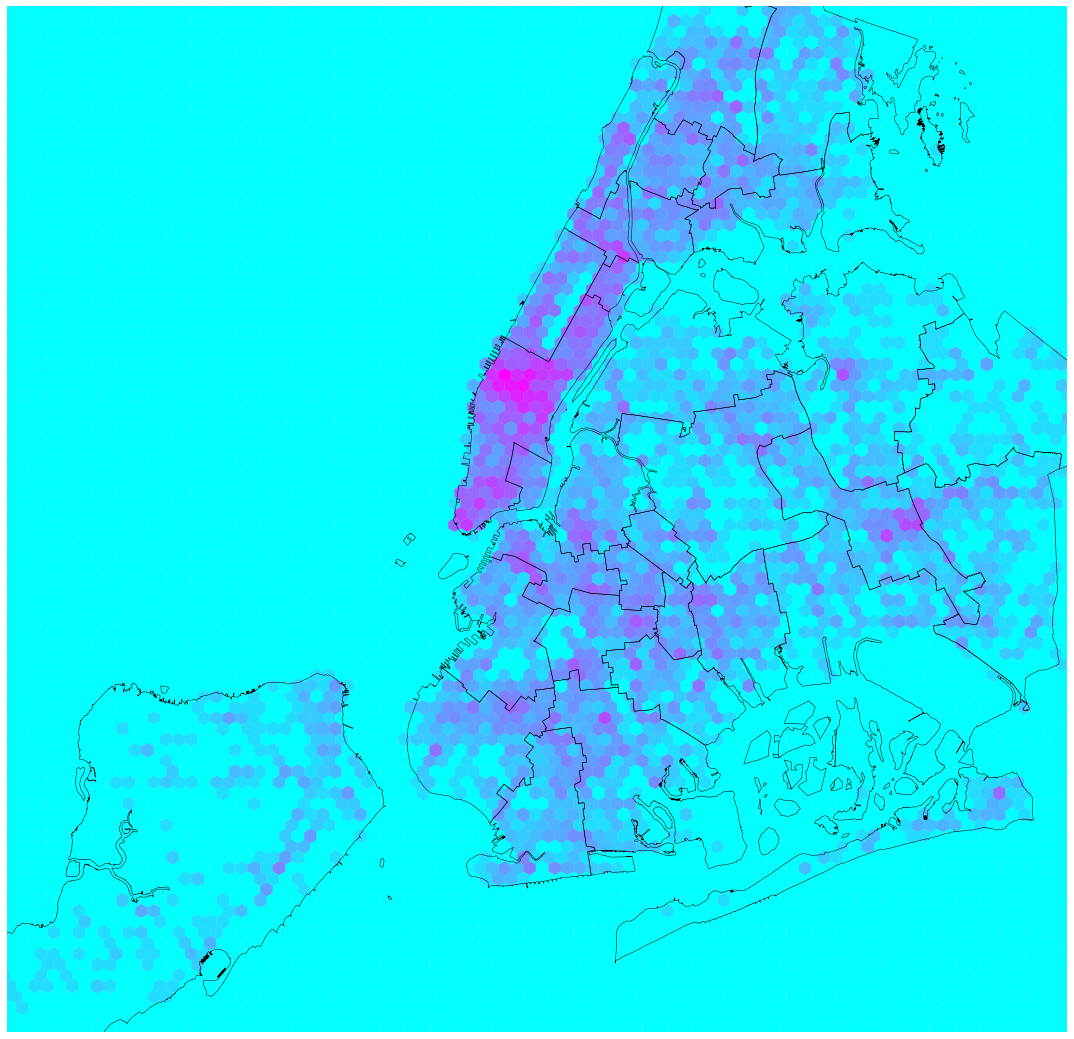

In [8]:
nycshp = fiona.open('../maps/nycd_16d/nysd_dd83.shp')
bounds = nycshp.bounds
nycshp.close()

lowerleft  = (bounds[0],bounds[1])
upperright = (bounds[2],bounds[3])

coordinates = list(chain(lowerleft,upperright))

width, height = coordinates[2] - coordinates[0], coordinates[3] - coordinates[1]

fig2 = plt.figure(figsize=(19,19))
ax2 = fig2.add_subplot(111)

m2 = Basemap(
    projection='tmerc',
    lon_0= -73.988814,
    lat_0=  40.752806,
    ellps = 'WGS84',
    llcrnrlon= bounds[0] + .02,
    llcrnrlat= bounds[1] + .02,
    urcrnrlon= bounds[2] - .02,
    urcrnrlat= bounds[3] - .02,
    lat_ts=0,
    resolution='i',
    suppress_ticks=True)

# x, y = m(busaxe['longitude'].values, busaxe['latitude'].values)
# m.hexbin(x, y, gridsize=40, bins='log', cmap=matplotlib.cm.YlOrRd_r)

yo2 = m2.readshapefile(shapefile = '../maps/nycd_16d/nysd_dd83', 
    name = 'nysd',  
    drawbounds=True, 
    zorder=None, 
    linewidth=0.5, 
    color='k', 
    antialiased=1, 
    ax=None, 
    default_encoding='utf-8')

# for info, shape in zip(m.nysd_info, m.nysd):
#     patches.append( Polygon(np.array(shape), True) )
        
# ax.add_collection(PatchCollection(patches, facecolor= 'm', edgecolor='k', linewidths=1., zorder=1))

x2, y2 = m2(busaxe['longitude'].values, busaxe['latitude'].values)
m2.hexbin(x2,y2, gridsize=90, bins='log', cmap=matplotlib.cm.cool)



## Question 1. Are bus accidents more likely to happen during the school year?
Issues: a lot of buses are tour buses and not school buses
## Question 2. Are bus accidents more likely to happen during commuting hours?

## Preliminary Notes
1. Most accidents involve two or fewer vehicles.
2. A bunch of accidents have no geolocator... 

PASSENGER VEHICLE                 852 
SPORT UTILITY / STATION WAGON     362 
TAXI                              206 
VAN                               137 
SMALL COM VEH(4 TIRES)             88 
BUS                                72 
LIVERY VEHICLE                     66 
OTHER                              62 
UNKNOWN                            59 
LARGE COM VEH(6 OR MORE TIRES)     39 
PICK-UP TRUCK                      25 
MOTORCYCLE                         21 
SCOOTER                             4 
FIRE TRUCK                          3 
BICYCLE                             2 
AMBULANCE                           2 
Name: vehicle_type_code1, dtype: int64

PASSENGER VEHICLE                 593
SPORT UTILITY / STATION WAGON     311
TAXI                              187
UNKNOWN                           186
VAN                               134
SMALL COM VEH(4 TIRES)             88
BUS                                65
BICYCLE                            57
OTHER                              54
LIVERY VEHICLE                     48
LARGE COM VEH(6 OR MORE TIRES)     42
PICK-UP TRUCK                      30
MOTORCYCLE                         13
FIRE TRUCK                          2
AMBULANCE                           2
Name: vehicle_type_code2, dtype: int64